In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Cargar el conjunto de datos

In [11]:
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/test.csv')
valid = pd.read_csv('data/validation.csv')

train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### Información descriptiva

In [12]:
print('Training shape:', train.shape)
print('Test shape:', test.shape)
print('Validation shape:', valid.shape)

Training shape: (16000, 2)
Test shape: (2000, 2)
Validation shape: (2000, 2)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


### Label Dsitributions

In [16]:
train['label'].value_counts() / train.shape[0]

label
1    0.335125
0    0.291625
3    0.134937
4    0.121063
2    0.081500
5    0.035750
Name: count, dtype: float64

In [17]:
test['label'].value_counts() / test.shape[0]

label
1    0.3475
0    0.2905
3    0.1375
4    0.1120
2    0.0795
5    0.0330
Name: count, dtype: float64

In [18]:
valid['label'].value_counts() / valid.shape[0]

label
1    0.3520
0    0.2750
3    0.1375
4    0.1060
2    0.0890
5    0.0405
Name: count, dtype: float64

### Revisión de duplicados

In [23]:
print('Duplicados en Train:', train[train.duplicated('text')].count()['text'])
print('Duplicados en Validation:', valid[valid.duplicated('text')].count()['text'])
print('Duplicados en Test:', test[test.duplicated('text')].count()['text'])

Duplicados en Train: 31
Duplicados en Validation: 2
Duplicados en Test: 0


In [24]:
train[train.duplicated('text', keep=False)].sort_values('text')

,text,label
8246,i am not amazing or great at photography but i...,2
3508,i am not amazing or great at photography but i...,1
15705,i began to feel accepted by gaia on her own terms,1
5277,i began to feel accepted by gaia on her own terms,2
8804,i bet taylor swift basks in the knowledge that...,4
...,...,...
11354,i write these words i feel sweet baby kicks fr...,2
7685,im still not sure why reilly feels the need to...,5
2908,im still not sure why reilly feels the need to...,4
9596,ive also made it with both sugar measurements ...,1


### Frecuencia de las emociones

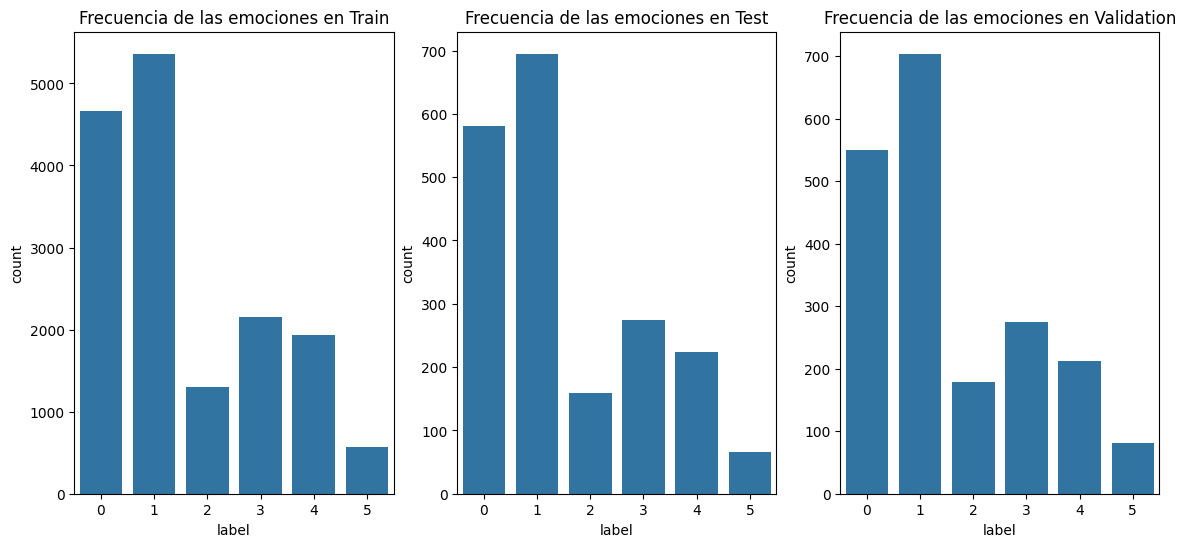

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=train, x='label')
plt.title('Frecuencia de las emociones en Train')

plt.subplot(1, 3, 2)
sns.countplot(data=test, x='label')
plt.title('Frecuencia de las emociones en Test')

plt.subplot(1, 3, 3)
sns.countplot(data=valid, x='label')
plt.title('Frecuencia de las emociones en Validation')

plt.show()

### Frecuencia y distribución de los tweets

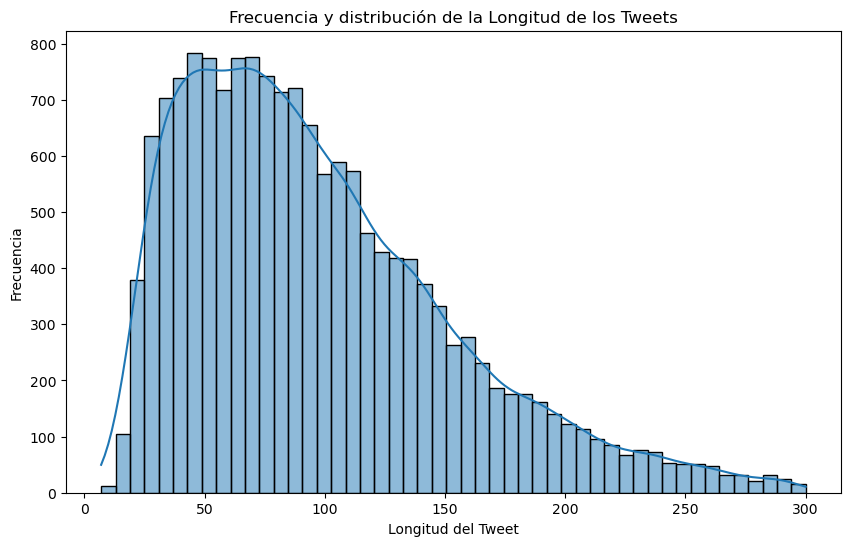

In [10]:
train['length'] = train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train['length'], kde= True)
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.title('Frecuencia y distribución de la Longitud de los Tweets')
plt.show()

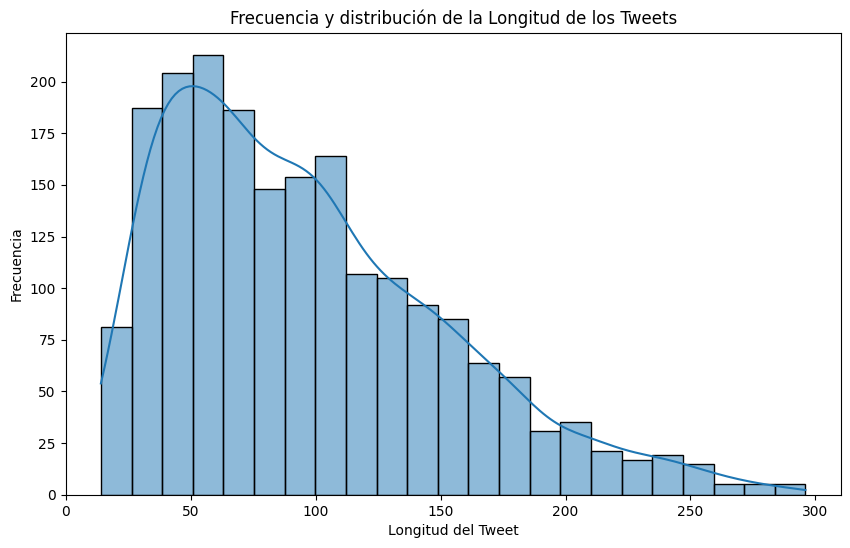

In [27]:
test['length'] = test['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test['length'], kde= True)
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.title('Frecuencia y distribución de la Longitud de los Tweets')
plt.show()

### Frecuencia de las palabras

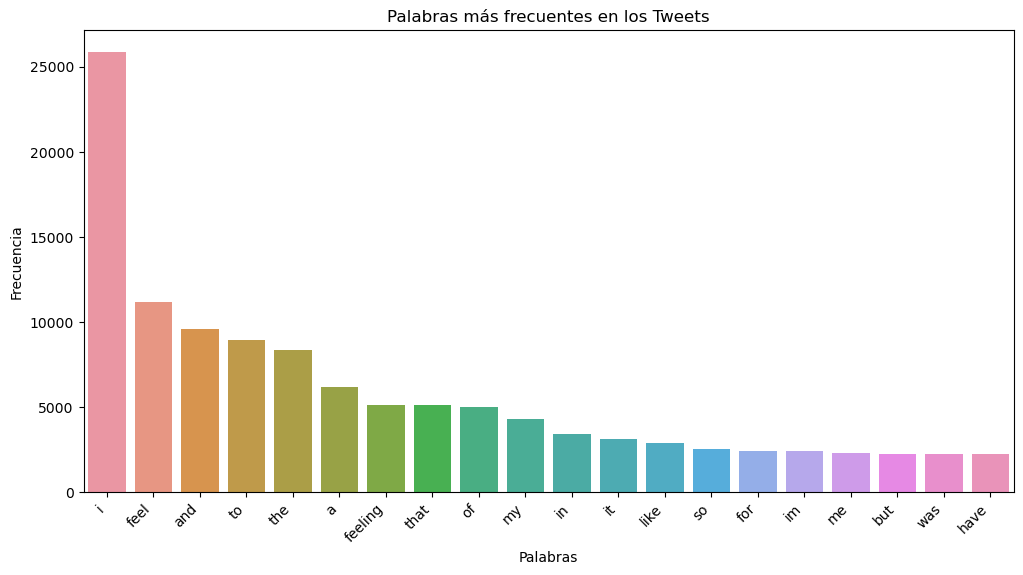

In [11]:
from collections import Counter
all_words = ' '.join([text for text in data['text']])
word_counts = Counter(all_words.split()) 
most_common = word_counts.most_common(20) 
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common], y=[word[1] for word in most_common])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en los Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

### Relación entre la longitud del tweet y la emoción

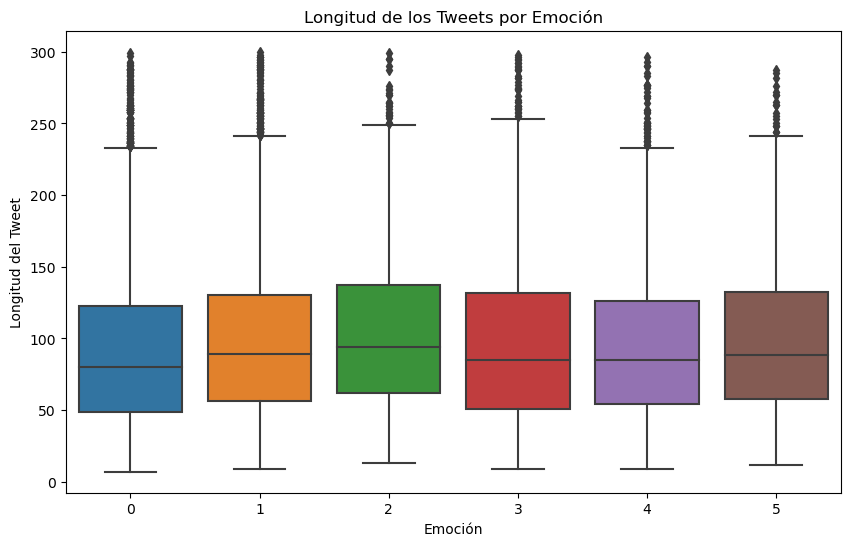

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length', data=data)
plt.xlabel('Emoción')
plt.ylabel('Longitud del Tweet')
plt.title('Longitud de los Tweets por Emoción')
plt.show()